Step 1: Import the necessary libraries and read the dataset into a Pandas DataFrame.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('CardioGoodFitness.csv')



Step 2: Perform data cleaning and preprocessing by checking for duplicates and missing values, and dropping them if necessary.

In [12]:
# Check for duplicates
duplicates = df.duplicated()
print('Number of duplicates:', duplicates.sum())

# Check for missing values
missing = df.isnull().sum()
print('Number of missing values:\n', missing)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop missing values
df.dropna(inplace=True)


Number of duplicates: 0
Number of missing values:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


Step 3: Visualize the data using charts and graphs to gain insights.

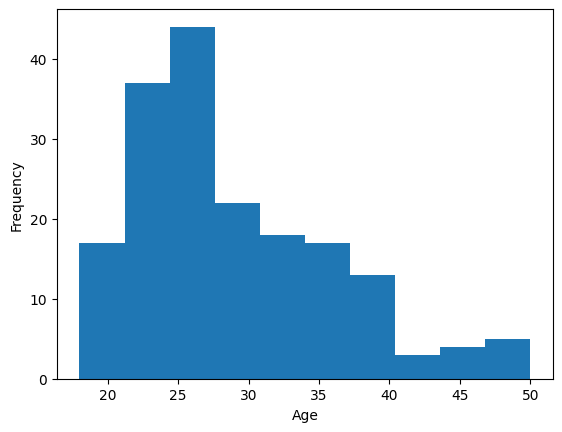

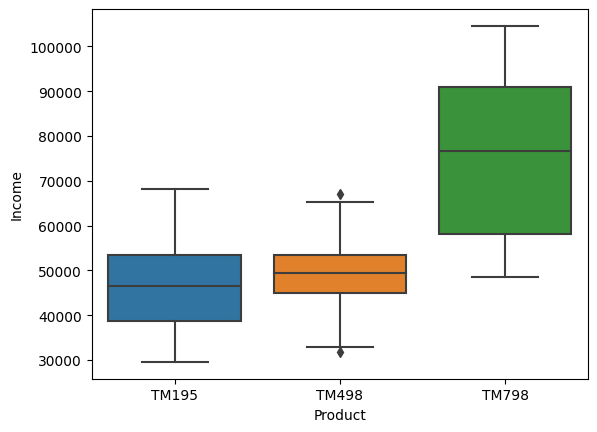

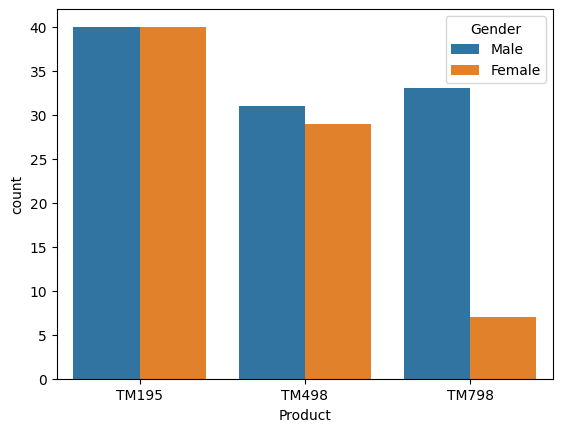

In [13]:
# Histogram of age
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot of income by treadmill product
sns.boxplot(x='Product', y='Income', data=df)
plt.show()

# Bar plot of gender distribution by treadmill product
sns.countplot(x='Product', hue='Gender', data=df)
plt.show()


Step 4: Use descriptive statistics to analyze each variable in the dataset.

In [14]:
# Descriptive statistics for age, income, and fitness
print(df.groupby('Product').agg({'Age': ['mean', 'median', 'std'], 'Income': ['mean', 'median', 'std'], 'Fitness': ['mean', 'median', 'std']}))


           Age                      Income                        Fitness   
          mean median       std       mean   median           std    mean   
Product                                                                     
TM195    28.55   26.0  7.221452  46418.025  46617.0   9075.783190  2.9625  \
TM498    28.90   26.0  6.645248  48973.650  49459.5   8653.989388  2.9000   
TM798    29.10   27.0  6.971738  75441.575  76568.5  18505.836720  4.6250   

                          
        median       std  
Product                   
TM195      3.0  0.664540  
TM498      3.0  0.629770  
TM798      5.0  0.667467  


Step 5: Use inferential statistics to determine if there are any significant differences between the customer profiles of the three treadmill products.

In [15]:
# T-test to compare the mean age of customers who purchased TM195 and TM498
from scipy.stats import ttest_ind
tm195_age = df[df['Product'] == 'TM195']['Age']
tm498_age = df[df['Product'] == 'TM498']['Age']
ttest_ind(tm195_age, tm498_age)

# ANOVA to compare the mean income of customers who purchased all three treadmill products
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
lm = ols('Income ~ Product', data=df).fit()
table = anova_lm(lm)
print(table)


             df        sum_sq       mean_sq          F        PR(>F)
Product     2.0  2.449025e+10  1.224513e+10  89.259035  1.564499e-27
Residual  177.0  2.428199e+10  1.371864e+08        NaN           NaN


Step 6: Use machine learning algorithms to predict which customer segments are more likely to purchase each of CardioGood Fitness' three treadmill products.

In [20]:
# Decision tree to predict which customers are more likely to purchase TM798
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = df[['Age', 'Gender', 'Education', 'Income', 'Miles', 'Fitness']]
y = df['Product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.56      0.50      0.53        10
           2       0.89      0.89      0.89         9

    accuracy                           0.72        36
   macro avg       0.72      0.72      0.72        36
weighted avg       0.72      0.72      0.72        36

